<a href="https://colab.research.google.com/github/8251960997/8251960997/blob/main/Retail_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -** Retail Sales Prediction Capstone Project

Project Type - EDA, Regression

Contribution - Individual

# Problem Statement

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# Github

Github Link :

# Data Description

Rossmann Stores Data.csv - historical data including Sales

store.csv - supplemental information about the stores

many data fields are in this exploratory analysis.



In [39]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

In [40]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
#Loading Rossman Dataset
rossman_df= pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data (1).csv', low_memory= False)

In [42]:
#Loading Store Dataset
store_df=pd.read_csv('/content/drive/MyDrive/store (1).csv', low_memory= False)

In [6]:
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
rossman_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


# **Information about of dataset**

In [8]:
rossman_df.shape

(1017209, 9)

In [9]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

# Description of this dataset

In [11]:
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
rossman_df.Store.nunique()

1115

In [13]:
# Value_counts of StateHoliday Column
rossman_df.StateHoliday.value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [14]:
print(rossman_df['Date'].min(),'initial')
print(rossman_df['Date'].max(),'final')

2013-01-01 initial
2015-07-31 final


# **Data of few years**

In [15]:
#extract year, month, day and week of year from "Date"

rossman_df['Date']=pd.to_datetime(rossman_df['Date'])
rossman_df['Year'] = rossman_df['Date'].apply(lambda x: x.year)
rossman_df['Month'] = rossman_df['Date'].apply(lambda x: x.month)
rossman_df['Day'] = rossman_df['Date'].apply(lambda x: x.day)
rossman_df['WeekOfYear'] = rossman_df['Date'].apply(lambda x: x.weekofyear)

In [16]:
#sort values
rossman_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


# EDA On Rossman Dataset

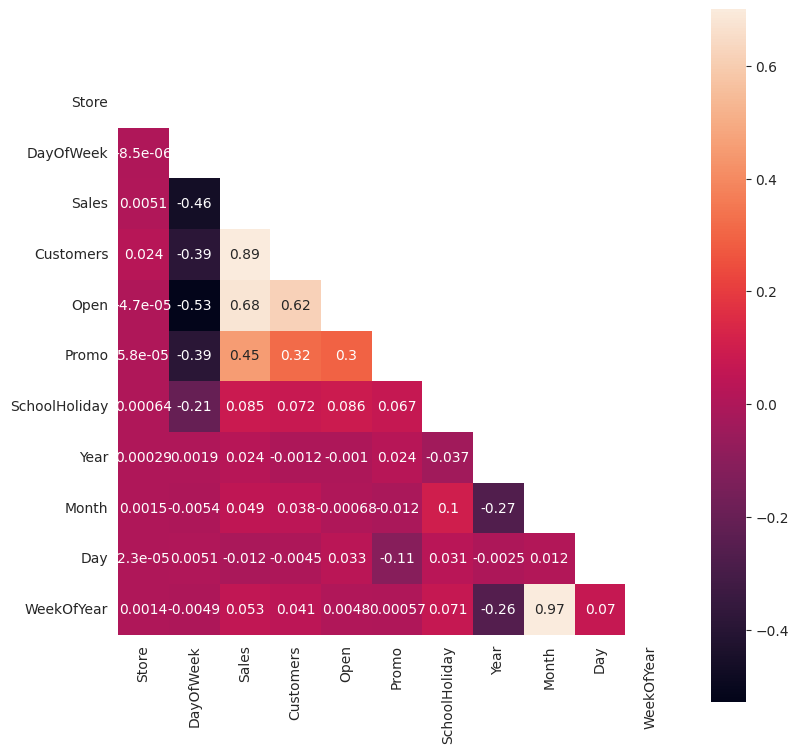

In [20]:
# Select only numeric columns for correlation calculation
numeric_cols = rossman_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_map = numeric_cols.corr()

# Mask the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_map, dtype=bool))

fig, ax = plt.subplots()
fig.set_size_inches(9, 9)
sns.heatmap(correlation_map, mask=mask, vmax=0.7, square=True, annot=True)

plt.show()


# In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas eve.

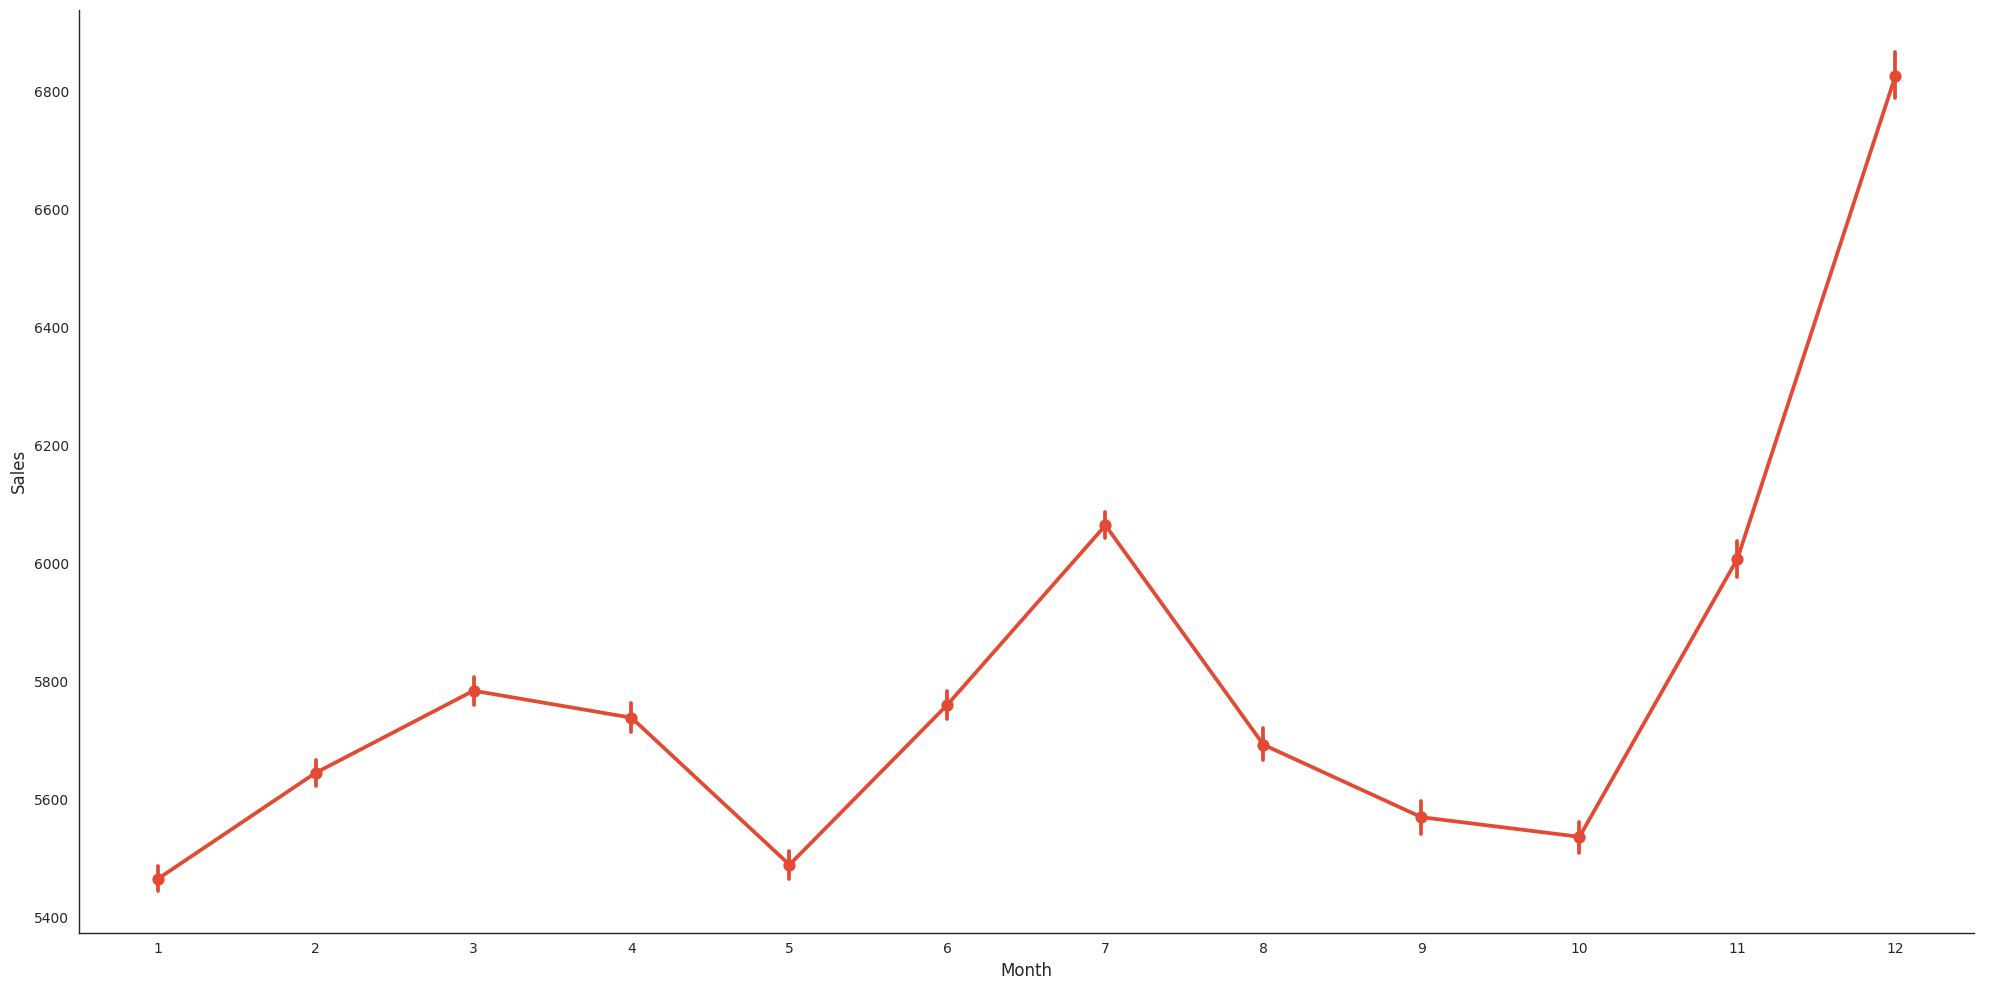

In [21]:
#increasing sales
sns.catplot(x="Month", y="Sales", data=rossman_df, kind="point", aspect=2, height=10)


In [22]:
# Value Counts of SchoolHoliday Column
rossman_df.SchoolHoliday.value_counts()

SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

 Sales affected by School Holiday and Mainly Sales aren't affected by School Holiday.

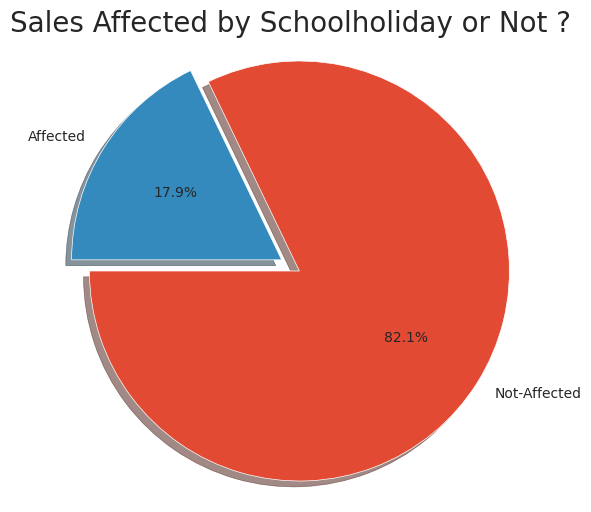

In [23]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels,
         autopct='%1.1f%%',shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

# Transforming Variable StateHoliday

In [24]:
rossman_df["StateHoliday"] = rossman_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [25]:
rossman_df.StateHoliday.value_counts()

StateHoliday
0    986159
1     31050
Name: count, dtype: int64

 Sales affected by State Holiday is only 3% means Sales aren't afffected by State Holiday.

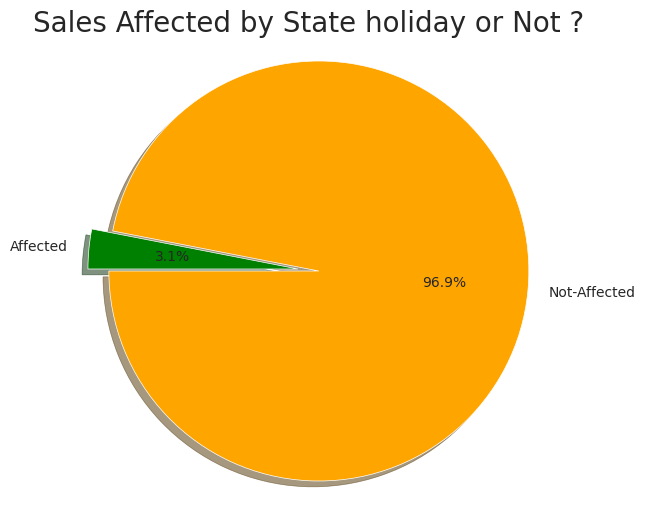

In [28]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.StateHoliday.value_counts()
colors = ['orange','green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

The graph given below that Stores mainly closed on Sunday.

<Axes: xlabel='DayOfWeek', ylabel='count'>

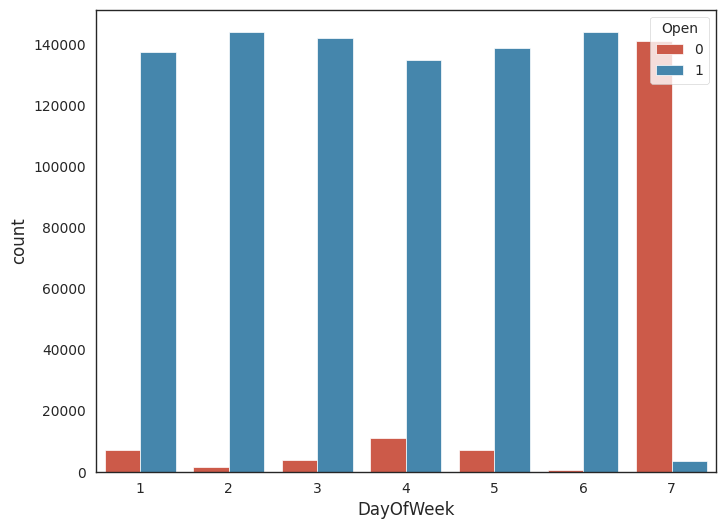

In [29]:
sns.countplot(x='DayOfWeek',hue='Open',data=rossman_df)

Histogram Representation of Sales here 0 is showing because most of the time store was closed.

<ipython-input-30-9e973c764c7b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rossman_df['Sales'], kde = False,bins=40);


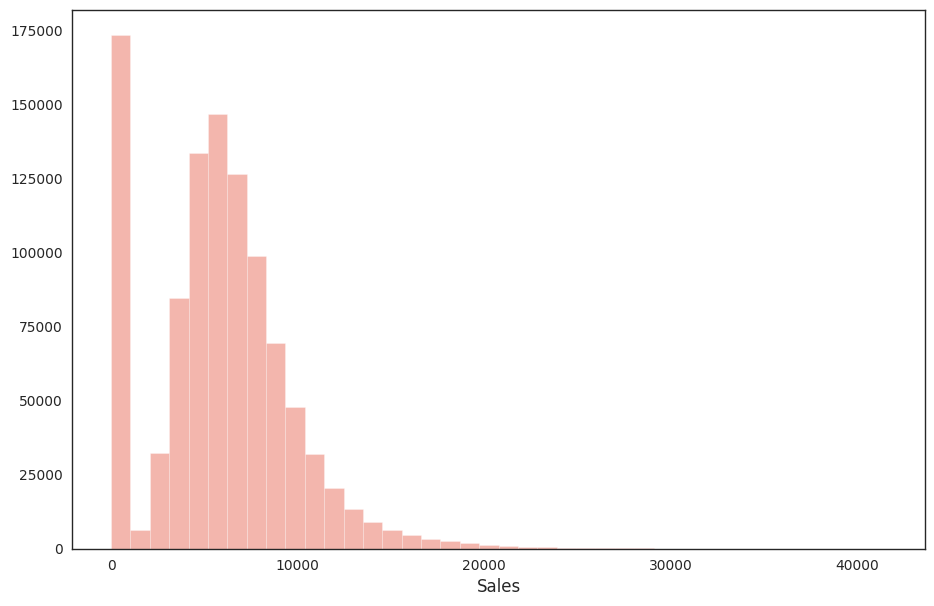

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(rossman_df['Sales'], kde = False,bins=40);

Relationship between sales and customers.

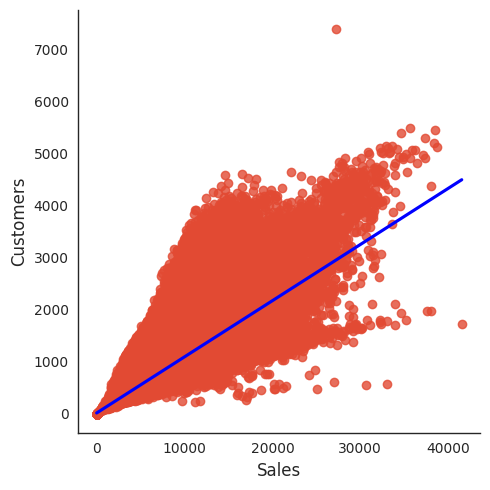

In [31]:
sns.lmplot(x= 'Sales' , y ='Customers',data=rossman_df, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'});

# Store dataset analysis

In [32]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [33]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


All information about of store dataset

In [34]:
#shape of datset
store_df.shape

(1115, 10)

In [35]:
#information of this dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [36]:
#checking null value
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Heatmap for null values

<Axes: >

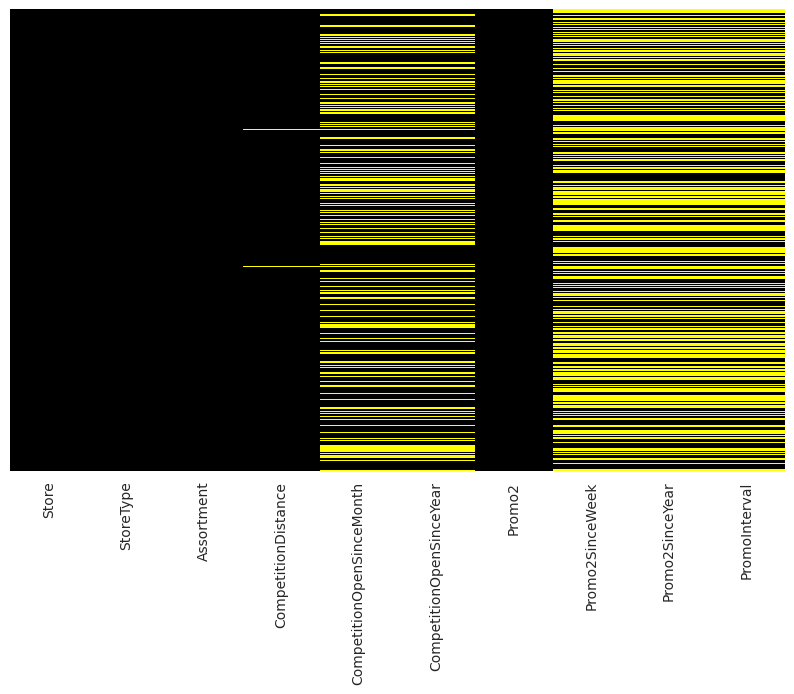

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(),yticklabels= False, cbar= False, cmap= 'gnuplot')

Distribution Of Different Store Types

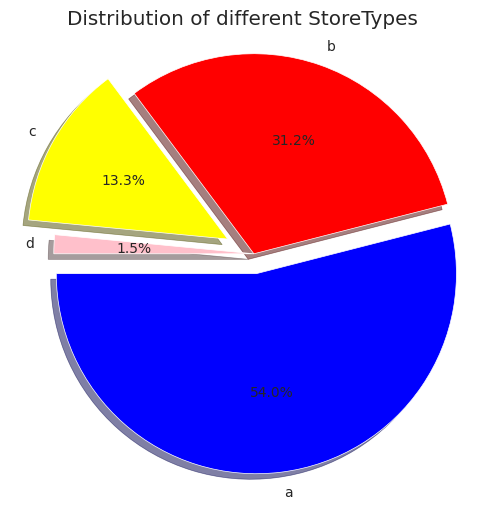

In [38]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_df.StoreType.value_counts()
colors = ['blue', 'red' , 'yellow' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

# Remove features with high percentages of missing values

In [39]:
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

# Replace missing values in features with low percentages of missing values

<ipython-input-40-16ade098606b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_df.CompetitionDistance.dropna())


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

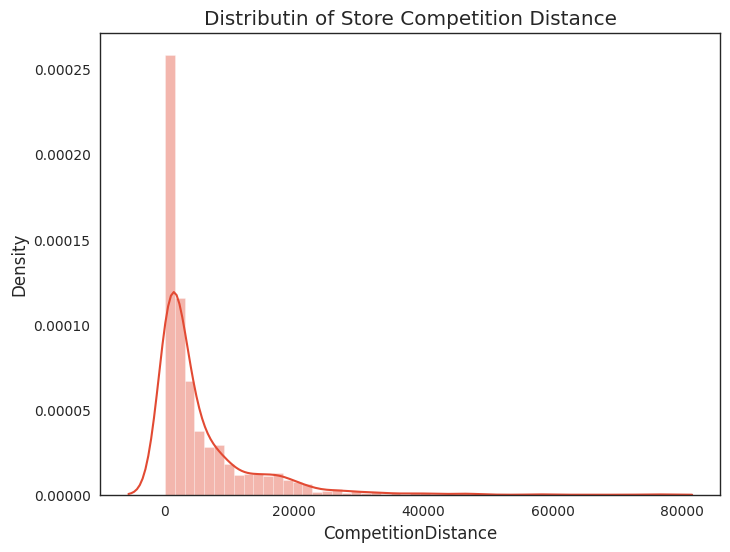

In [40]:
sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

The distribution is right skewed, so we'll replace missing values with the median.

In [42]:
store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

 Store dataset visualization by pairplot.

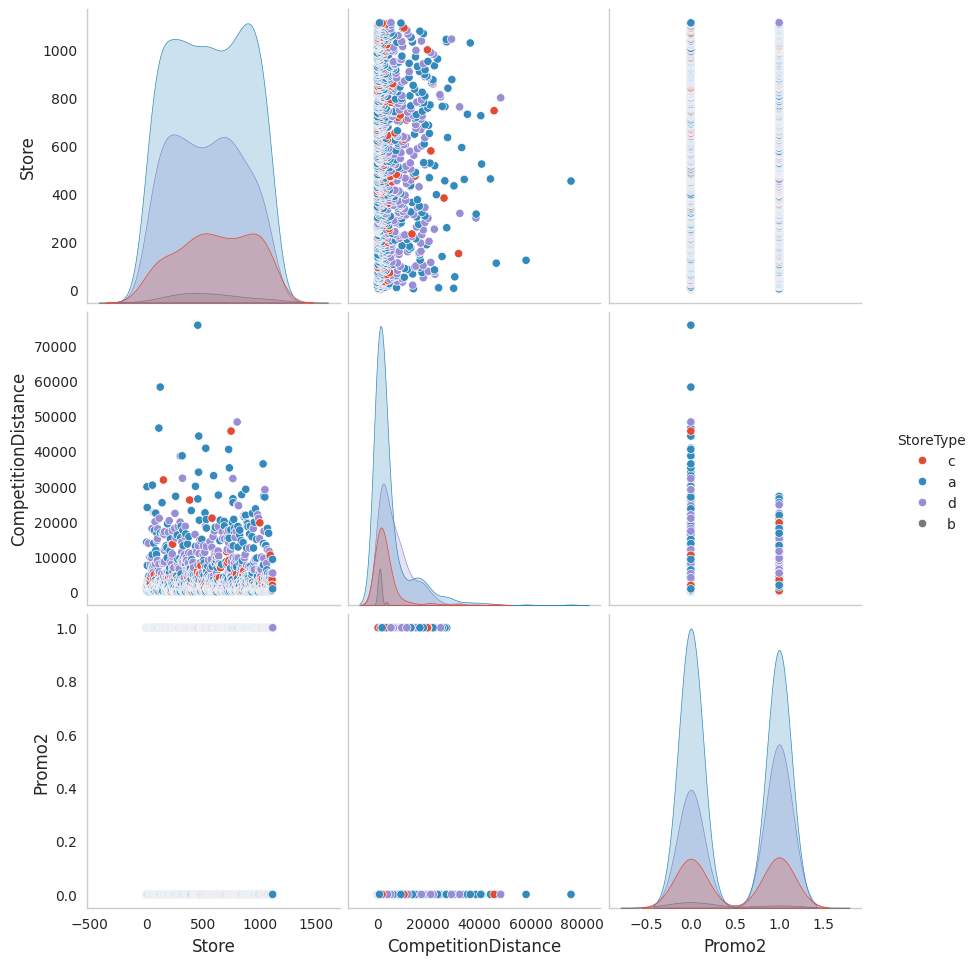

In [43]:
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10);

Plotting year vs sales

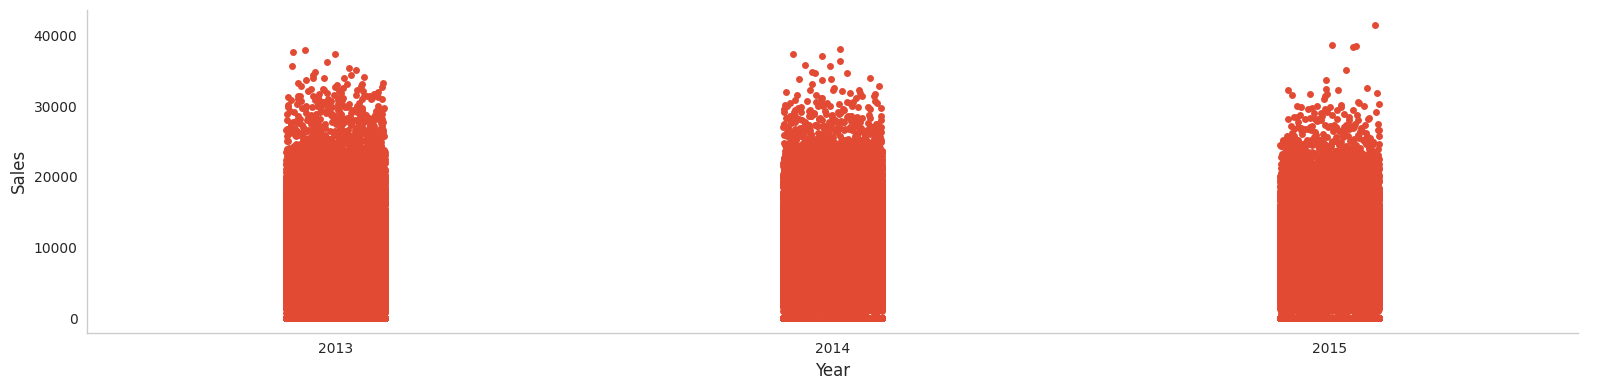

In [44]:
sns.catplot(x='Year',y='Sales',data=rossman_df, height=4, aspect=4 );

Years classification type

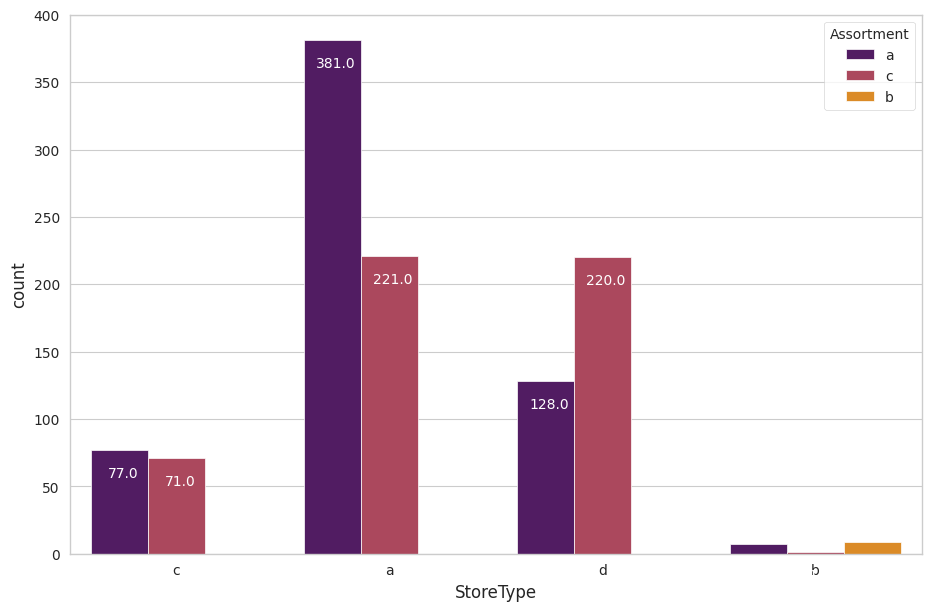

In [45]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

# Merge two datsets

In [43]:
df = pd.merge(rossman_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [47]:
df.shape

(1017209, 17)

# EDA On Merged Dataset

Merged dataset visualization by heatmap

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

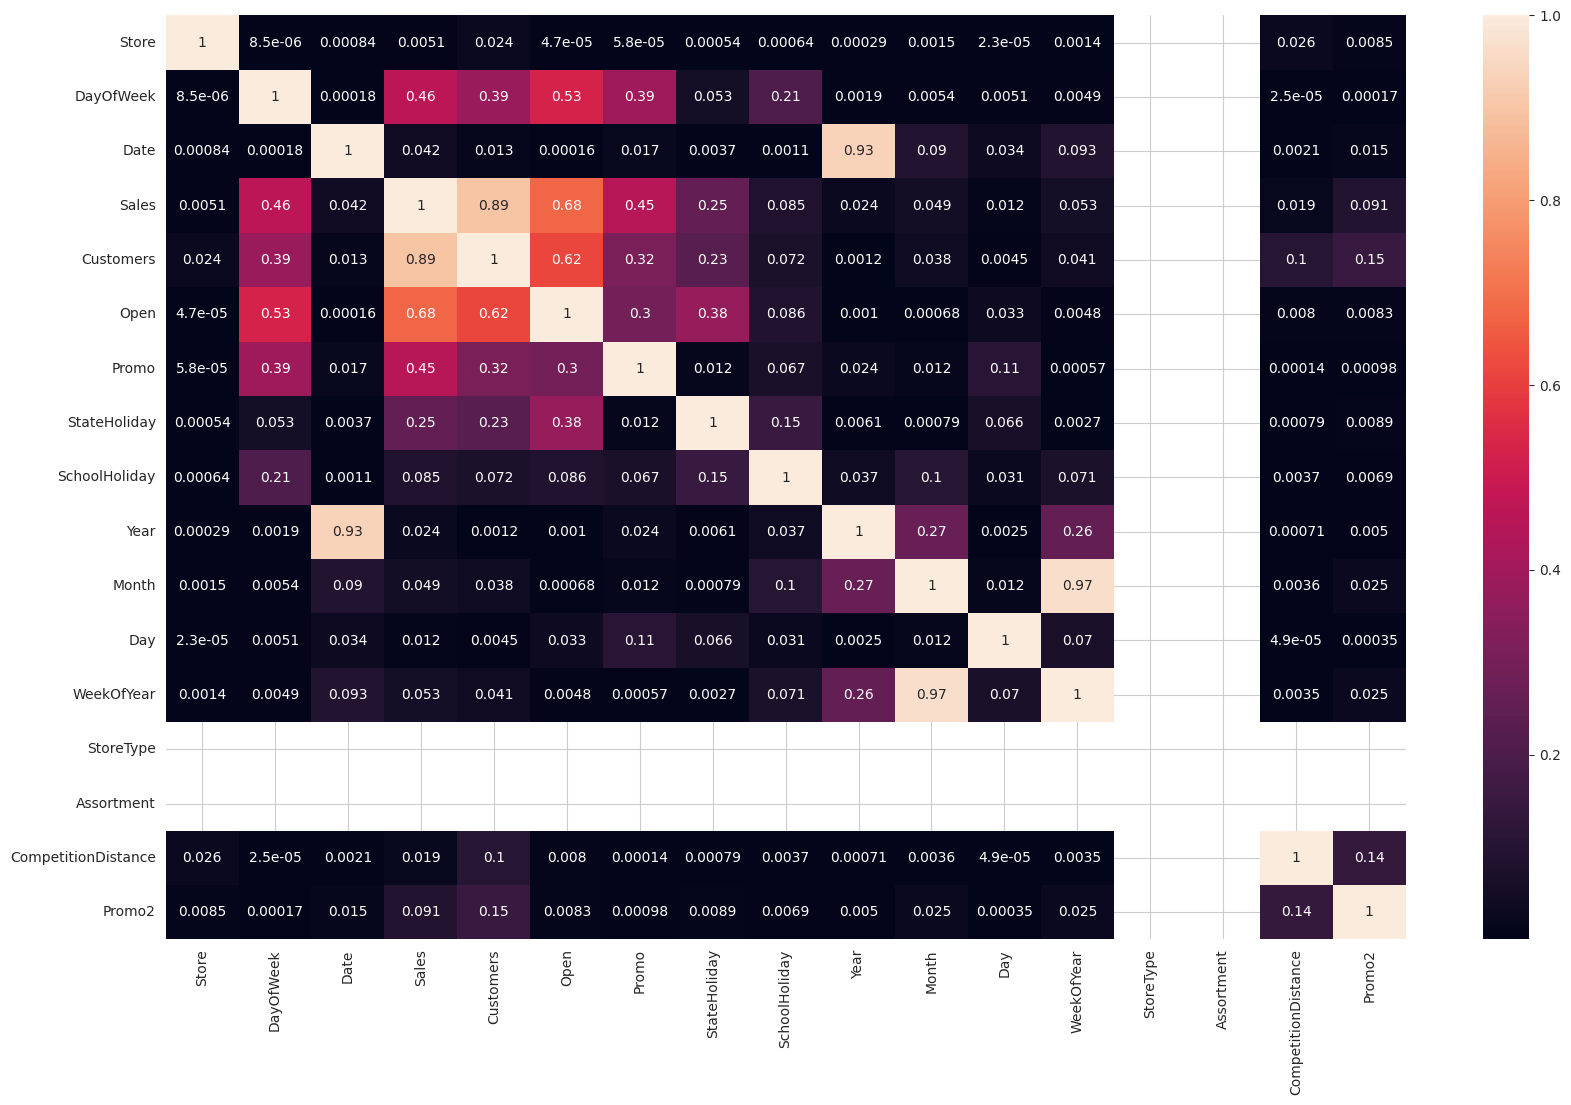

In [49]:
# Convert non-numeric values to NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_map = df_numeric.corr().abs()
plt.subplots(figsize=(20, 12))
sns.heatmap(correlation_map, annot=True)#save this file

# Save the heatmap
plt.savefig("heatmap.png")

# Download the file
from google.colab import files
files.download('heatmap.png')

In [44]:
df["Avg_Customer_Sales"] = df.Sales/df.Customers

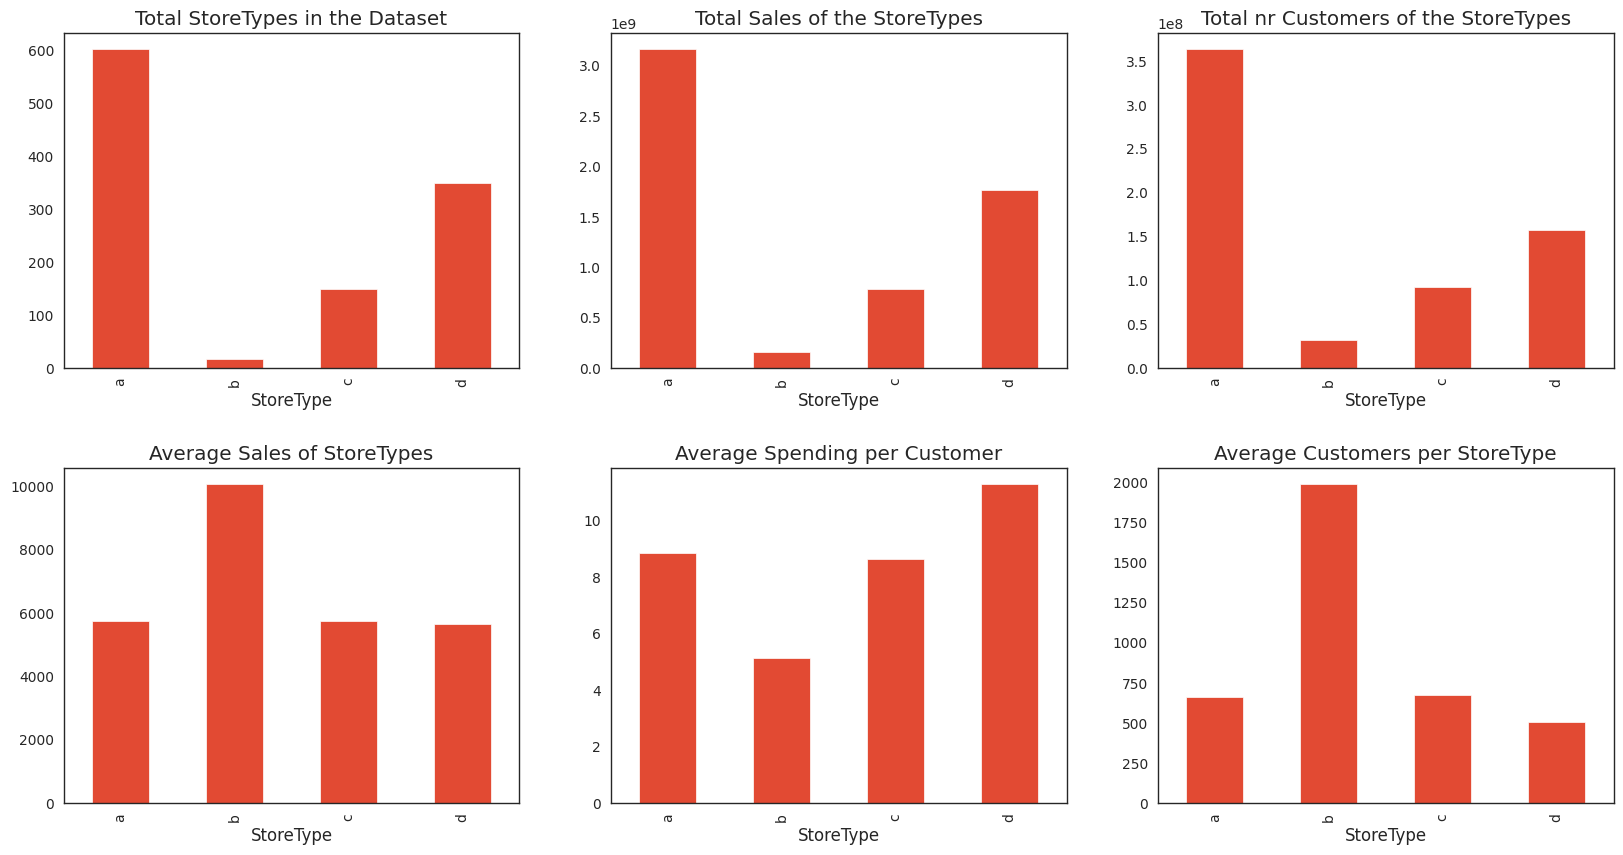

In [45]:
#sales of storetype
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.

# checking outliers in sales

<Axes: ylabel='Sales'>

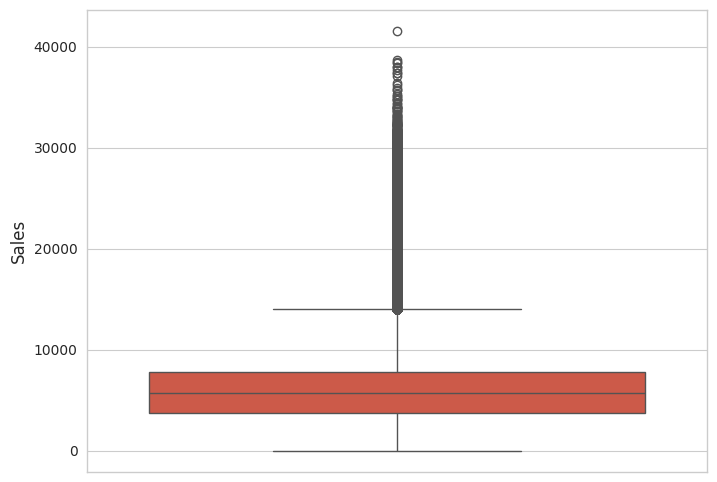

In [52]:
sns.boxplot(rossman_df['Sales'])

In [53]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [54]:
# defining new variable after removing outliers
df= remove_outlier(df, 'Sales')

# **conclusion**

In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas eve.

sales not-affected in school holidays.

store type A is most selling and crowded store type.

store type B hsa lowest sales.

Sales are highly correlated to number of Customers.

More stores are opened during School holidays than State holidays.

so by the rossmon dataset analysis all these things by the graphs.

# Drop Subsets Of Data Where Might Cause Bias

In [50]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

In [51]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [52]:
#percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [53]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [54]:
df_new=df.copy()

In [55]:
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])

In [56]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceYear,PromoInterval,Avg_Customer_Sales,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,0,1,1270.0,9.0,...,NaN,NaN,9.482883,False,False,True,False,True,False,False
1,2,5,2015-07-31,6064,625,1,0,1,570.0,11.0,...,2010.0,"Jan,Apr,Jul,Oct",9.702400,True,False,False,False,True,False,False
2,3,5,2015-07-31,8314,821,1,0,1,14130.0,12.0,...,2011.0,"Jan,Apr,Jul,Oct",10.126675,True,False,False,False,True,False,False
3,4,5,2015-07-31,13995,1498,1,0,1,620.0,9.0,...,NaN,NaN,9.342457,False,False,True,False,False,False,True
4,5,5,2015-07-31,4822,559,1,0,1,29910.0,4.0,...,NaN,NaN,8.626118,True,False,False,False,True,False,False


# we can see most of the sales have been on 1st and last day of week

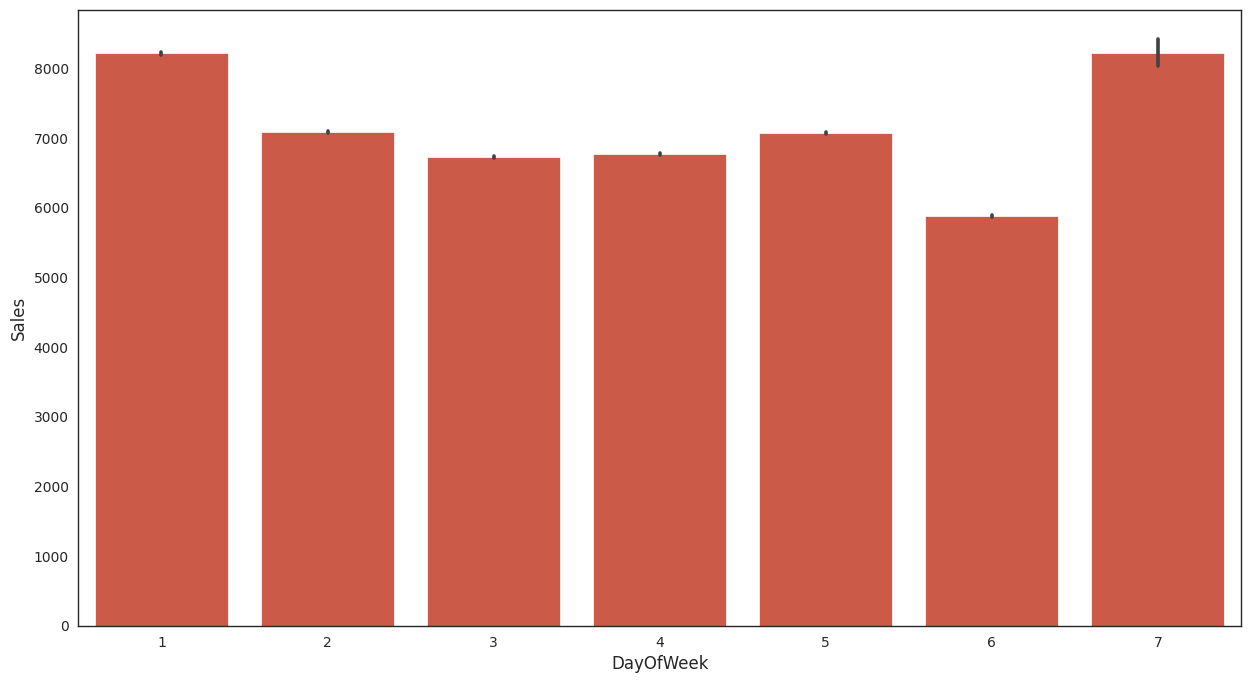

In [57]:
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df_new);

Setting Features and Target Variables

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

## **Implementing Supervised Machine Learning algorithms.**

# 1. Linear Regression

In [62]:
#data transforming
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [64]:
regressor.intercept_

-1072.7314586573284

In [65]:
regressor.coef_

array([200.79179969, 222.07156656, 187.92626552, 507.52135706,
        45.90383301,  74.31331669, 426.8778124 ,  54.37962191,
        36.63562904, 335.36240587])

In [66]:
#predicting test
y_pred = regressor.predict(X_test)

In [67]:
mean_squared_error(y_test, y_pred)

0.008800162157717664

In [68]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

0.09380917949602621

In [69]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.9999994704838474

In [70]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.9999994602209896

In [71]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred})

In [72]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

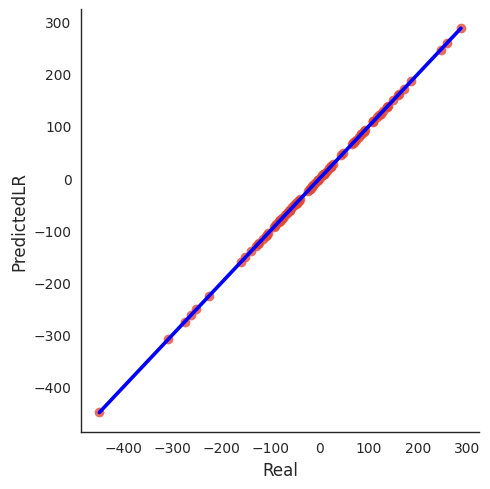

In [73]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'blue'});

# 2. Lasso Regression

In [74]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py:109: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [75]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y):
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2=lasreg.score(X_train, y_train)
test_score_2=lasreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)

y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.39438721607766614 , Out of Sample Test Score : 0.3502603147057879
Training RMSE : 104.4163966463862 Testing RMSE : 102.9217205924286
Training MAPE : 190.69426193006765 Testing MAPE : 176.44930424268045


# 3. Decision Tree Regression

In [76]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

In [77]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 1.0 , Test Score : 0.560841681568474
Training RMSE : 0.0 Testing RMSE : 84.61510501360479
Training MAPE : 0.0 Testing MAPE : 336.5458692772655


decision Tree With Hyper Parameter Tuning

In [78]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
treereg = tree.fit(X_train, y_train)

In [79]:
train_score_4=treereg.score(X_train, y_train)
test_score_4=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_4 , "," ,
      "Test Score" ,":" , test_score_4)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8618721945286805 , Test Score : 0.6019552372948423
Training RMSE : 49.866827642587296 Testing RMSE : 80.55700253155526
Training MAPE : 116.19564260216333 Testing MAPE : 242.73732344601783


In [80]:
#storing 100 observations for analysis
dc_pred = y_test_predicted[:100]
dc_real = y_test[:100]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred})

In [81]:
#storing absolute diffrences between actual sales price and predicted
dataset_dc['diff']=(dataset_dc['Real']-dataset_dc['PredictedDC']).abs()

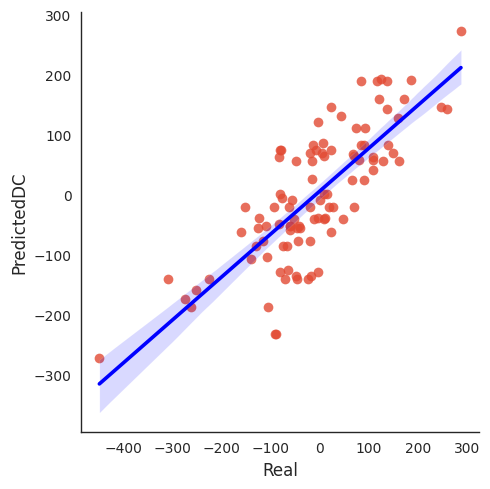

In [82]:
#visualising predictions
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'blue'});

# 4. Support Vector Regression

In [ ]:
#%%time
#from sklearn.svm import SVR
#svr=SVR()
#svr_reg=svr.fit(X_train,y_train)
#svr

In [ ]:
#print("Regresion Model Score" , ":" , svr_reg.score(X_train, y_train) , "," ,
#      "Out of Sample Test Score" ,":" , svr_reg.score(X_test, y_test))

#y_predicted = svr_reg.predict(X_train)
#y_test_predicted = svr_reg.predict(X_test)

#print("Training RMSE", ":", rmse(y_train, y_predicted),
#      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
#print("Training MAPE", ":", mape(y_train, y_predicted),
#      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Its unable to run so...

# 5. K-Nearest Neighbors Regression

In [83]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create K-Nearest Neighbors Regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 3728.3442939729885


In [84]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=30)
knnreg = knn.fit(X_train, y_train)


In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate and print regression model scores
print("Regression Model Score:", knnreg.score(X_train, y_train))
print("Out of Sample Test Score:", knnreg.score(X_test, y_test))

y_train_predicted = knnreg.predict(X_train)
y_test_predicted = knnreg.predict(X_test)

# Calculate RMSE for training and testing sets
train_rmse = mean_squared_error(y_train, y_train_predicted, squared=False)
test_rmse = mean_squared_error(y_test, y_test_predicted, squared=False)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

train_mape = mape(y_train, y_train_predicted)
test_mape = mape(y_test, y_test_predicted)
print("Training MAPE:", train_mape)
print("Testing MAPE:", test_mape)


Regression Model Score: 0.7311487013932437
Out of Sample Test Score: 0.7139109199561546
Training RMSE: 68.76508898783499
Testing RMSE: 69.47406533359685
Training MAPE: 73.2006186774448
Testing MAPE: 74.19220092606162


# 6. Random Forest With Hyper Parameter Tuning

In [ ]:
# rfr=RandomForestRegressor(n_jobs=-1)

# params = {
#          'n_estimators':[40,50,60,70,80,90],
#          'min_samples_split':[2,3,6,8],
#          'min_samples_leaf':[1,2,3,4],
#          'max_depth':[None,5,15,30]
#          }

# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)

# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.
# grid.fit(X_train, y_train)
# grid.best_params_

I trained Model with hyper parameters but not run everytime.

In [86]:
#%%time
rdf = RandomForestRegressor(n_estimators=80, min_samples_split=2, min_samples_leaf=1, max_depth=None, n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)


In [87]:
from sklearn.metrics import mean_squared_error

# Calculate and print regression model scores
train_score_5 = rdfreg.score(X_train, y_train)
test_score_5 = rdfreg.score(X_test, y_test)
print("Regression Model Score:", train_score_5)
print("Test Score:", test_score_5)

y_train_predicted_2 = rdfreg.predict(X_train)
y_test_predicted_2 = rdfreg.predict(X_test)

# Calculate RMSE for training and testing sets
train_rmse_2 = mean_squared_error(y_train, y_train_predicted_2, squared=False)
test_rmse_2 = mean_squared_error(y_test, y_test_predicted_2, squared=False)
print("Training RMSE:", train_rmse_2)
print("Testing RMSE:", test_rmse_2)

# Calculate MAPE for training and testing sets (assuming you have defined the mape function previously)
train_mape_2 = mape(y_train, y_train_predicted_2)
test_mape_2 = mape(y_test, y_test_predicted_2)
print("Training MAPE:", train_mape_2)
print("Testing MAPE:", test_mape_2)


Regression Model Score: 0.9768245960318782
Test Score: 0.8395556552766748
Training RMSE: 20.18950153206647
Testing RMSE: 52.02765827333963
Training MAPE: 42.89628503742571
Testing MAPE: 100.53710950737056


In [88]:
y_test_predicted_2

array([ -15.48724609,   35.1288067 ,  -66.07371244, -254.33184554,
        -50.4059317 ,   39.95945393, -145.44037016,  -25.09766151,
        -20.72734481,  151.90867056, -219.7249476 ,  -46.06139161,
         53.16959076, -102.82099926,   87.07299147, -186.96660174,
        -68.08862996,    2.02331508,   81.74065086,  -77.25777161,
         53.93291225,  158.31916369,  137.77525467,  -36.9464055 ,
        184.49928714,  -31.0945048 , -211.00789573,  164.86710815,
         88.71146967,  183.27768188,  173.23244366,  -95.03525317,
        -76.55521985,   54.64115369,  -84.63602441, -123.87539846,
        -11.14799092,  -20.13810478,   40.23826456,  -87.51913839,
         61.60205825,   -3.59060717,   19.38766267,   62.10365952,
       -106.55323686,   -8.01815005, -117.16514596,  -28.96413955,
         61.75509649, -105.27772792,   11.79906955,  131.06890941,
        190.22567923,  -18.99385585,  -90.566993  ,  -96.92855764,
         93.25833117,   81.73462473,   38.84802103,  -29.95945

In [89]:
#storing 100 observations for analysis
rf_prd = y_test_predicted_2[:100]
rf_real = y_test[:100]
dataset_rf = pd.DataFrame({'Real':rf_real,'PredictedRF':rf_prd})

In [90]:
  #storing absolute diffrences between actual sales price and predicted
dataset_rf['diff']=(dataset_rf['Real']-dataset_rf['PredictedRF']).abs()

In [92]:
dataset_rf.sample(5)

,Real,PredictedRF,diff
11,-56.628205,-46.061392,10.566813
74,-162.421616,-161.607293,0.814322
88,-51.493464,-87.636152,36.142688
28,41.540325,88.711470,47.171144
55,-98.711198,-96.928558,1.782640


In [93]:
dataset_rf.describe()

,Real,PredictedRF,diff
count,100.000000,100.000000,100.000000
mean,13.058791,3.182588,42.565018
std,134.067269,106.700319,32.648069
min,-325.843106,-254.331846,0.307463
25%,-80.885762,-76.730858,17.658563
50%,15.922952,-0.783646,35.726799
75%,90.398322,63.297857,60.949801
max,342.343154,222.757823,142.443846


<ipython-input-94-dd97ec5297cc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


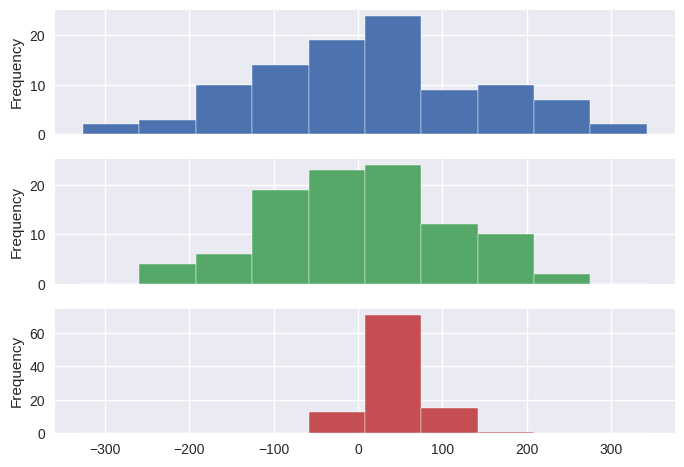

In [94]:
#plotting predicted value
plt.style.use('seaborn')
dataset_rf.plot.hist(subplots=True, legend=False);

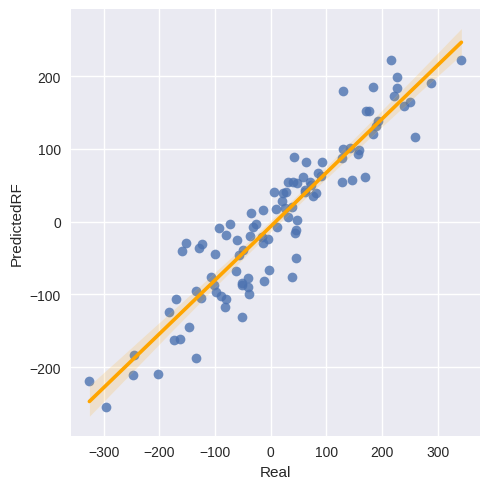

In [95]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedRF', data=dataset_rf, line_kws={'color': 'orange'},  aspect=1);

# Feature Importance On Random Forest Regressor

In [1]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

 # bar plot
  plt.figure(figsize=(10,8))
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [ ]:
#Random forest feature importance
plot_feature_importance(rdfreg.feature_importances_,columns[:],'RANDOM FOREST')

Customers, CompetitionDistance, StoreType_d, Promo these four are most important features in our sales prediction.

In [97]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,train_score_2,train_score_3,train_score_4,train_score_5],'Test_Score':[test_score_1,test_score_2,test_score_3,test_score_4,test_score_5]},index=['Linear Regression','Lasso Regression','Decision Tree',"Decision Tree(hyperparameters)",'Random Forest Regression'])

# **Conclusion**

In [98]:
score_df

,Train_Score,Test_Score
Linear Regression,0.999999,0.999999
Lasso Regression,0.394387,0.350260
Decision Tree,1.000000,0.560842
Decision Tree(hyperparameters),0.861872,0.601955
Random Forest Regression,0.976825,0.839556


This dataset is visualizing store sales then next part was traing and testing then i extract linear regression, lasso regression, decision tree, support vector regression, k-nearest neighbor regression and random forest regression all are given above and their scores.
